In [1]:
set.seed(42)

In [2]:
require(data.table)

Loading required package: data.table


In [3]:
require(tidyverse)

Loading required package: tidyverse
Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
between():   dplyr, data.table
filter():    dplyr, stats
first():     dplyr, data.table
lag():       dplyr, stats
last():      dplyr, data.table
transpose(): purrr, data.table


In [4]:
require(featureTweakR)

Loading required package: featureTweakR


In [45]:
data(PimaIndiansDiabetes, package="mlbench")

In [46]:
dim(PimaIndiansDiabetes)
levels(PimaIndiansDiabetes$diabetes)
head(PimaIndiansDiabetes)

[1] 768   9

[1] "neg" "pos"

pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
6,148,72,35,0,33.6,0.627,50,pos
1,85,66,29,0,26.6,0.351,31,neg
8,183,64,0,0,23.3,0.672,32,pos
1,89,66,23,94,28.1,0.167,21,neg
0,137,40,35,168,43.1,2.288,33,pos
5,116,74,0,0,25.6,0.201,30,neg


In [47]:
setnames(PimaIndiansDiabetes, old = c("pregnant", "glucose", "pressure", "triceps", "insulin", "mass", "pedigree", "age"),
         new = c('PREGNANCY', 'GLUCOSE', 'BLOOD_PRESSURE', 'SKIN_THICKNESS', 'INSULIN', 'BMI', 'DIABETES_PEDIGREE_FUNCTION', 'AGE'))

In [48]:
summary(PimaIndiansDiabetes)

   PREGNANCY         GLUCOSE      BLOOD_PRESSURE   SKIN_THICKNESS 
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    INSULIN           BMI        DIABETES_PEDIGREE_FUNCTION      AGE       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780             Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437             1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725             Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719             Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262             3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200             Max.   :81.00  

In [69]:
dataset <- sample_frac(PimaIndiansDiabetes) %>% dataSplit(test.ratio = 0.15)

[Split data] train : test = 653 : 115 obs. (9 colmns)


In [70]:
#features <- c('PREGNANCY', 'GLUCOSE', 'BLOOD_PRESSURE', 'SKIN_THICKNESS', 'INSULIN', 'BMI', 'DIABETES_PEDIGREE_FUNCTION', 'AGE')
features <- c('GLUCOSE', 'BLOOD_PRESSURE', 'SKIN_THICKNESS', 'INSULIN', 'BMI')

In [71]:
data.train <- dataset$train %>% select(features)
true.y     <- dataset$train[ ,ncol(dataset$train)]
data.test  <- dataset$test  %>% select(features) %>% head(100)

In [72]:
es <- learnModel(X.train = data.train, true.y = true.y, ntree = 100)


Call:
 randomForest(x = train.scaled, y = true.y, ntree = ntree) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 27.87%
Confusion matrix:
    neg pos class.error
neg 346  72   0.1722488
pos 110 125   0.4680851

extracting all (100 of 100 trees)
Time difference of 39.93406 secs
set e-satisfactory instance (100 trees)
Time difference of 11.94647 secs


In [73]:
ft <- predict(es, newdata = data.test, label.from = "pos", label.to = "neg")

76 instances were predicted by 100 trees: 

neg pos 
 48  28 
Time difference of 1.2529 mins


[1] "direction"
        variable         mean       median
1 BLOOD_PRESSURE -0.042991840 -0.042991840
2            BMI -0.067375393 -0.067375393
3        GLUCOSE -0.222829873 -0.222829873
4        INSULIN  0.007864908  0.007864908
5 SKIN_THICKNESS  0.039236859  0.039236859


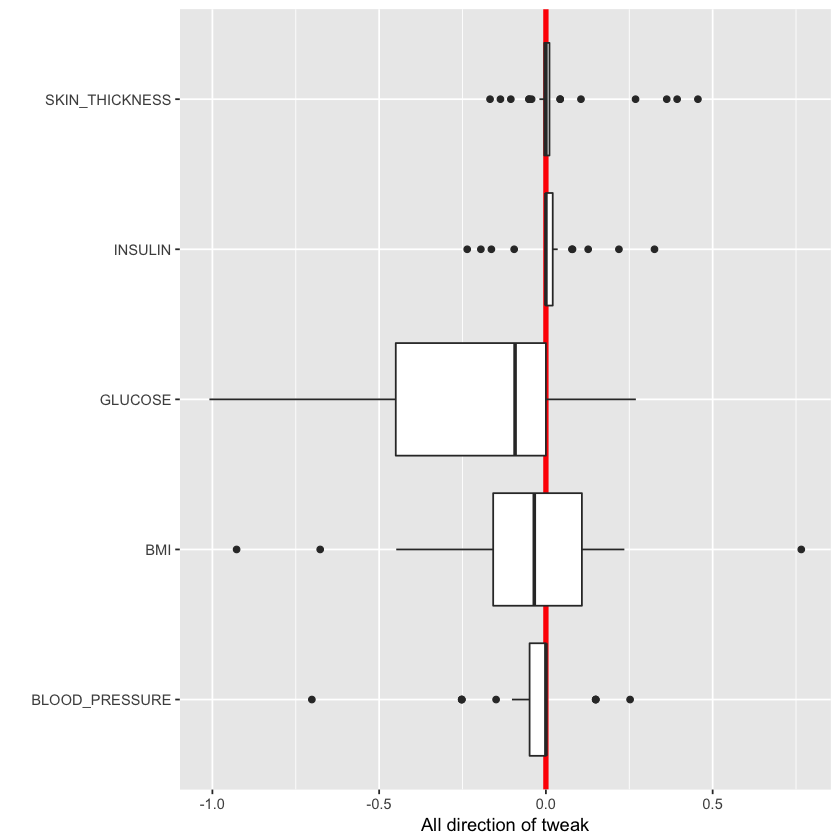

In [74]:
plot(ft, type = "direction")

instance #12
                         key       value
1             BLOOD_PRESSURE  0.00000000
2                        BMI -0.44538599
3 DIABETES_PEDIGREE_FUNCTION  0.05093173
4                    GLUCOSE  0.09754945
5                    INSULIN  0.00000000
6                  PREGNANCY -0.44686474
7             SKIN_THICKNESS -0.14349259


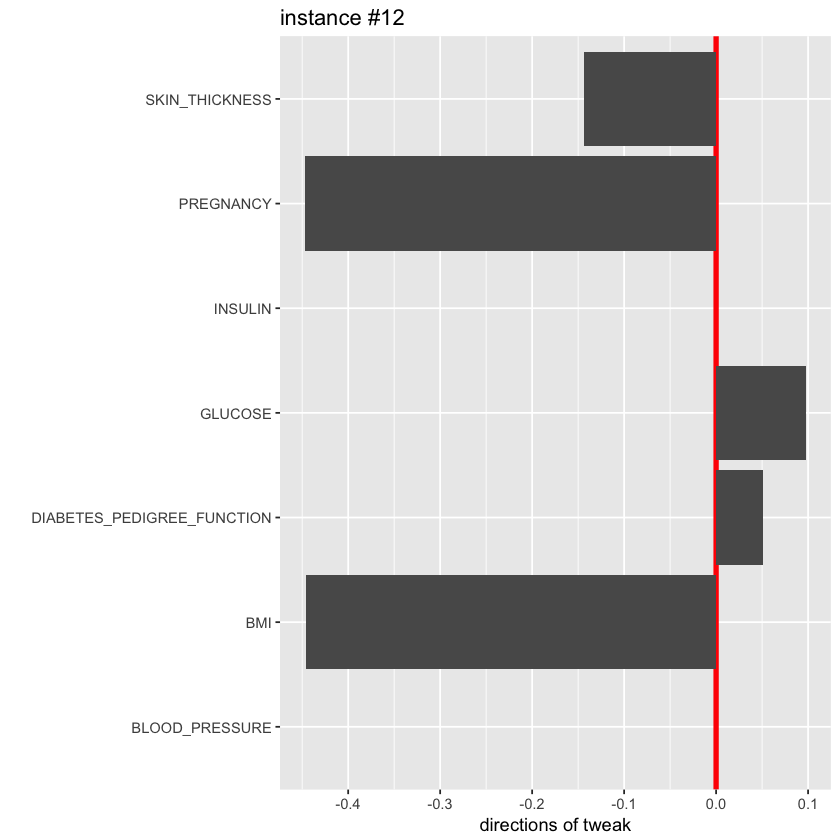

In [26]:
plot(ft, k=12)

In [ ]:
plot(ft, k=36)

In [43]:
data(spam, package = "kernlab")

In [44]:
dim(spam)
levels(spam$type)
head(spam)

[1] 4601   58

[1] "nonspam" "spam"

make,address,all,num3d,our,over,remove,internet,order,mail,⋯,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,spam
0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,⋯,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,spam
0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,⋯,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,spam
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,spam
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,spam
0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,⋯,0.00,0.223,0,0.000,0.000,0.000,3.000,15,54,spam


In [45]:
names(spam) <- toupper(names(spam))

In [46]:
names(spam)

[1] "MAKE"              "ADDRESS"           "ALL"              
 [4] "NUM3D"             "OUR"               "OVER"             
 [7] "REMOVE"            "INTERNET"          "ORDER"            
[10] "MAIL"              "RECEIVE"           "WILL"             
[13] "PEOPLE"            "REPORT"            "ADDRESSES"        
[16] "FREE"              "BUSINESS"          "EMAIL"            
[19] "YOU"               "CREDIT"            "YOUR"             
[22] "FONT"              "NUM000"            "MONEY"            
[25] "HP"                "HPL"               "GEORGE"           
[28] "NUM650"            "LAB"               "LABS"             
[31] "TELNET"            "NUM857"            "DATA"             
[34] "NUM415"            "NUM85"             "TECHNOLOGY"       
[37] "NUM1999"           "PARTS"             "PM"               
[40] "DIRECT"            "CS"                "MEETING"          
[43] "ORIGINAL"          "PROJECT"           "RE"               
[46] "EDU"               "TABLE"             "CONFERENCE"       
[49] "CHARSEMICOLON"     "CHARROUNDBRACKET"  "CHARSQUAREBRACKET"
[52] "CHAREXCLAMATION"   "CHARDOLLAR"        "CHARHASH"         
[55] "CAPITALAVE"        "CAPITALLONG"       "CAPITALTOTAL"     
[58] "TYPE"

In [47]:
setnames(spam, old=c('CHARSEMICOLON', 'CHARROUNDBRACKET', 'CHARSQUAREBRACKET', 'CHAREXCLAMATION', 'CHARDOLLAR', 'CHARHASH', 'CAPITALAVE', 'CAPITALLONG', 'CAPITALTOTAL'), 
         new=c('CHAR_SEMICOLON', 'CHAR_ROUND_BRACKET', 'CHAR_SQUARE_BRACKET', 'CHAR_EXCLAMATION', 'CHAR_DOLLAR', 'CHAR_HASH', 'AVG_CAPITAL_LENGTH', 'MAX_CAPITAL_LENGTH', 'NUM_CAPITALS'))

In [48]:
names(spam)

[1] "MAKE"                "ADDRESS"             "ALL"                
 [4] "NUM3D"               "OUR"                 "OVER"               
 [7] "REMOVE"              "INTERNET"            "ORDER"              
[10] "MAIL"                "RECEIVE"             "WILL"               
[13] "PEOPLE"              "REPORT"              "ADDRESSES"          
[16] "FREE"                "BUSINESS"            "EMAIL"              
[19] "YOU"                 "CREDIT"              "YOUR"               
[22] "FONT"                "NUM000"              "MONEY"              
[25] "HP"                  "HPL"                 "GEORGE"             
[28] "NUM650"              "LAB"                 "LABS"               
[31] "TELNET"              "NUM857"              "DATA"               
[34] "NUM415"              "NUM85"               "TECHNOLOGY"         
[37] "NUM1999"             "PARTS"               "PM"                 
[40] "DIRECT"              "CS"                  "MEETING"            
[43] "ORIGINAL"            "PROJECT"             "RE"                 
[46] "EDU"                 "TABLE"               "CONFERENCE"         
[49] "CHAR_SEMICOLON"      "CHAR_ROUND_BRACKET"  "CHAR_SQUARE_BRACKET"
[52] "CHAR_EXCLAMATION"    "CHAR_DOLLAR"         "CHAR_HASH"          
[55] "AVG_CAPITAL_LENGTH"  "MAX_CAPITAL_LENGTH"  "NUM_CAPITALS"       
[58] "TYPE"

In [49]:
dataset <- sample_frac(spam) %>% dataSplit(test.ratio = 0.1)

[Split data] train : test = 4141 : 460 obs. (58 colmns)


In [58]:
important.var <- c("CHAR_SEMICOLON", "CHAR_EXCLAMATION", "CHAR_DOLLAR", "REMOVE", "FREE", "ORDER", "BUSINESS", "MONEY", "AVG_CAPITAL_LENGTH", "MAX_CAPITAL_LENGTH")

In [59]:
data.train <- dataset$train %>% select(important.var)
true.y     <- dataset$train[ ,ncol(dataset$train)]
data.test  <- dataset$test  %>% select(important.var) %>% head(500)

In [60]:
es <- learnModel(X.train = data.train, true.y = true.y, ntree = 50)


Call:
 randomForest(x = train.scaled, y = true.y, ntree = ntree) 
               Type of random forest: classification
                     Number of trees: 50
No. of variables tried at each split: 3

        OOB estimate of  error rate: 7.68%
Confusion matrix:
        nonspam spam class.error
nonspam    2380  112  0.04494382
spam        206 1443  0.12492420

extracting all (50 of 50 trees)
Time difference of 1.120539 mins
set e-satisfactory instance (50 trees)
Time difference of 13.72658 secs


In [61]:
ft <- predict(es, newdata = data.test, label.from = "spam", label.to = "nonspam")

460 instances were predicted by 50 trees: 

nonspam    spam 
    301     159 
Time difference of 14.86867 mins


[1] "direction"
             variable         mean       median
1  AVG_CAPITAL_LENGTH -0.246096211 -0.246096211
2            BUSINESS -0.042444324 -0.042444324
3         CHAR_DOLLAR -0.113146294 -0.113146294
4    CHAR_EXCLAMATION -0.399056134 -0.399056134
5      CHAR_SEMICOLON  0.100083333  0.100083333
6                FREE -0.158645166 -0.158645166
7  MAX_CAPITAL_LENGTH -0.163695992 -0.163695992
8               MONEY -0.078356271 -0.078356271
9               ORDER -0.002863919 -0.002863919
10             REMOVE -0.323481138 -0.323481138


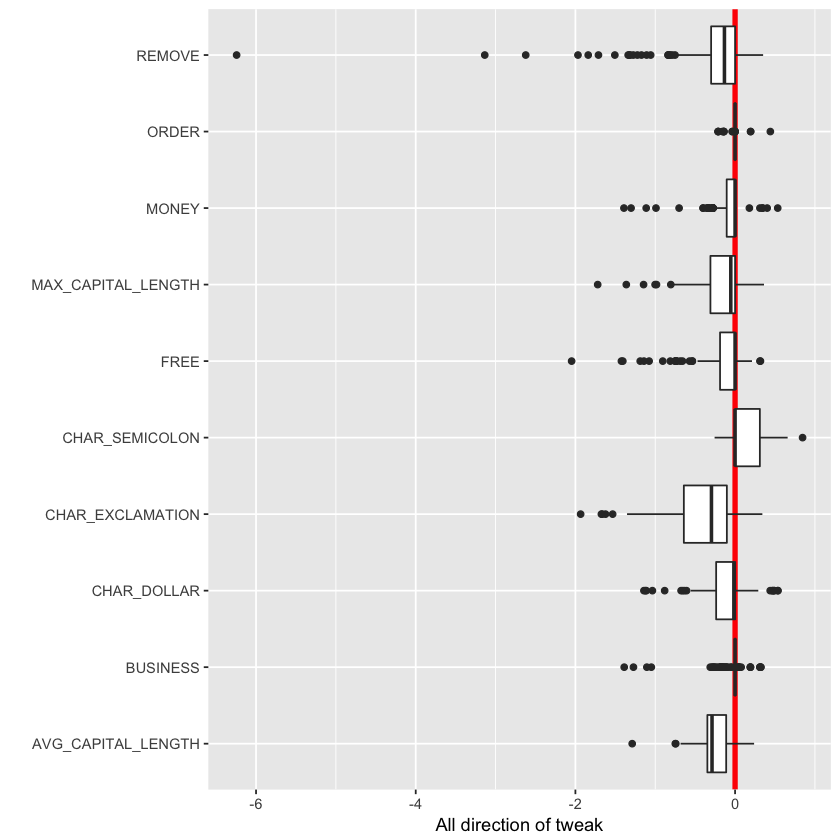

In [62]:
plot(ft, type = "direction")

instance #4
              key      value
1      capitalAve  0.0000000
2     capitalLong  0.0000000
3      charDollar -0.1785824
4 charExclamation  0.0000000
5            free  0.0000000
6              hp  0.5408441
7           order  0.0000000
8          remove -0.1004799
9            your  0.0000000


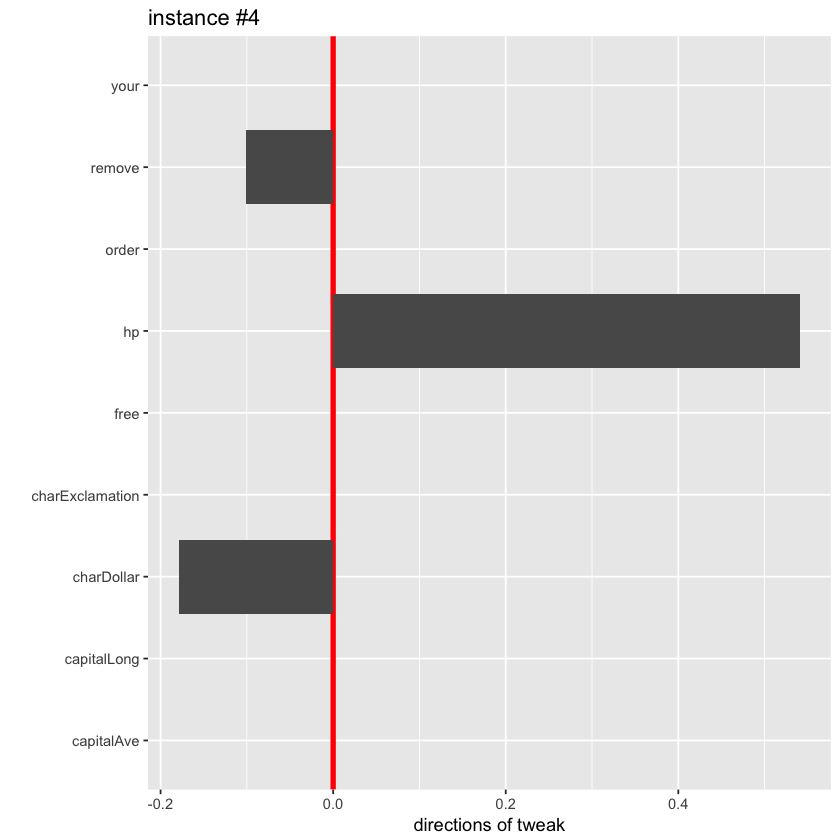

In [13]:
plot(ft, k=4)

In [ ]:
plot(ft, k=11)